# 使用Diffusers官方接口使用

 双目标-效果较好

In [ ]:
import torch
from diffusers import StableDiffusionAttendAndExcitePipeline

pipe = StableDiffusionAttendAndExcitePipeline.from_pretrained(
    "G:/code/model/stable-diffusion-v1-4", torch_dtype=torch.float16
).to("cuda")


prompt = "a cat and a frog"


In [ ]:

# use get_indices function to find out indices of the tokens you want to alter
pipe.get_indices(prompt)


In [5]:

# 需要手动指定
token_indices = [2, 5]
seed = 6141
generator = torch.Generator("cuda").manual_seed(seed)

images = pipe(
    prompt=prompt,
    token_indices=token_indices,
    guidance_scale=7.5,
    generator=generator,
    num_inference_steps=50,
    max_iter_to_alter=25,
).images

image = images[0]
image.save(f"images/{prompt}_{seed}.png")

  0%|          | 0/50 [00:00<?, ?it/s]

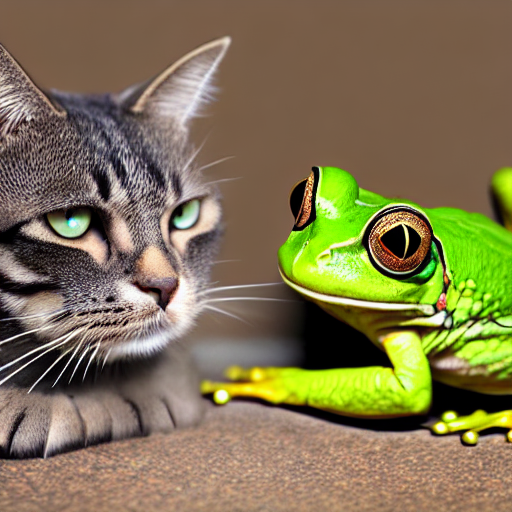

In [7]:
# 多目标保存效果很好
image

多目标——效果比较一般

In [15]:
# 四目标
prompt_2='a cat,a frog,a dog and a bird'
pipe.get_indices(prompt_2)

{0: '<|startoftext|>',
 1: 'a</w>',
 2: 'cat</w>',
 3: ',</w>',
 4: 'a</w>',
 5: 'frog</w>',
 6: ',</w>',
 7: 'a</w>',
 8: 'dog</w>',
 9: 'and</w>',
 10: 'a</w>',
 11: 'bird</w>',
 12: '<|endoftext|>'}

In [12]:
token_indices_2 = [2,5,8,11]
seed = 6141
generator = torch.Generator("cuda").manual_seed(seed)
images = pipe(
    prompt=prompt_2,
    token_indices=token_indices_2,
    guidance_scale=7.5,
    generator=generator,
    num_inference_steps=50,
    max_iter_to_alter=25,
).images

image = images[0]
image.save(f"images/{prompt_2}_{seed}.png")

  0%|          | 0/50 [00:00<?, ?it/s]

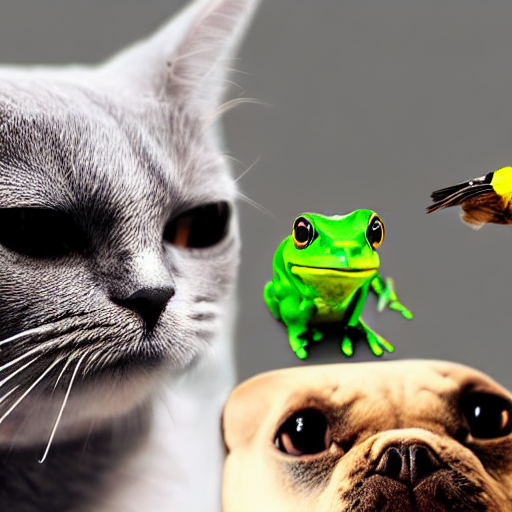

In [13]:
image

In [14]:
# 7目标
prompt_3='a cat,a frog,a dog,a bird,a snake,a horse,a cow'
pipe.get_indices(prompt_3)

{0: '<|startoftext|>',
 1: 'a</w>',
 2: 'cat</w>',
 3: ',</w>',
 4: 'a</w>',
 5: 'frog</w>',
 6: ',</w>',
 7: 'a</w>',
 8: 'dog</w>',
 9: ',</w>',
 10: 'a</w>',
 11: 'bird</w>',
 12: ',</w>',
 13: 'a</w>',
 14: 'snake</w>',
 15: ',</w>',
 16: 'a</w>',
 17: 'horse</w>',
 18: ',</w>',
 19: 'a</w>',
 20: 'cow</w>',
 21: '<|endoftext|>'}

In [16]:
token_indices_3 = [2,5,8,11,14,17,20]
seed = 6141
generator = torch.Generator("cuda").manual_seed(seed)
images = pipe(
    prompt=prompt_3,
    token_indices=token_indices_3,
    guidance_scale=7.5,
    generator=generator,
    num_inference_steps=50,
    max_iter_to_alter=25,
).images

image = images[0]
image.save(f"images/{prompt_3}_{seed}.png")

  0%|          | 0/50 [00:00<?, ?it/s]

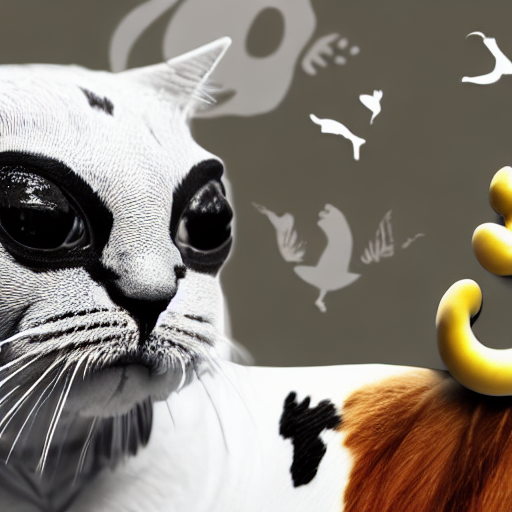

In [17]:
image

测试属性分配

In [19]:
prompt_4="A black and white spotted dog and a light green horse are walking in the desert."
pipe.get_indices(prompt_4)

{0: '<|startoftext|>',
 1: 'a</w>',
 2: 'black</w>',
 3: 'and</w>',
 4: 'white</w>',
 5: 'spotted</w>',
 6: 'dog</w>',
 7: 'and</w>',
 8: 'a</w>',
 9: 'light</w>',
 10: 'green</w>',
 11: 'horse</w>',
 12: 'are</w>',
 13: 'walking</w>',
 14: 'in</w>',
 15: 'the</w>',
 16: 'desert</w>',
 17: '.</w>',
 18: '<|endoftext|>'}

In [22]:
token_indices_4 = [6,11]
seed = 42
generator = torch.Generator("cuda").manual_seed(seed)
images = pipe(
    prompt=prompt_4,
    token_indices=token_indices_4,
    guidance_scale=7.5,
    generator=generator,
    num_inference_steps=50,
    max_iter_to_alter=25,
).images

image = images[0]
image.save(f"images/{prompt_4}_{seed}.png")

  0%|          | 0/50 [00:00<?, ?it/s]

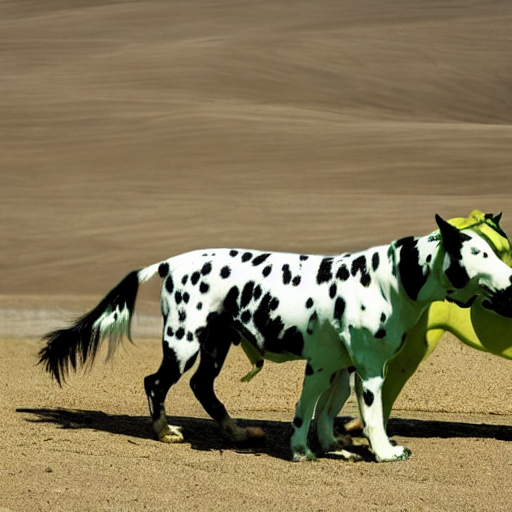

In [24]:
image

Attend and excite 生成的图片似乎容易出现图像似乎被裁剪，主体显示不完全的问题？？
在简单的双目标小表现还可以，在属性错误分配上很差。可能是基座模型sd1.4不够强大，下一步可以尝试在sdxl、flux等上面做一下实验
